In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso


Dataset loading and visualising using .head() function

In [8]:
data=pd.read_csv('/content/drive/MyDrive/abalone.csv')

"""Adding a constant coulmn in the data"""

data['W0']=1
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,W0
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [3]:
"""data visualisation"""
N=len(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   W0              4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [4]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,W0
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.0
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,1.0
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.0
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,1.0
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,1.0
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,1.0
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.0
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.0


We now need to hot encode all the coulmns of data which contains text

In [9]:
"""Hot encoding of "Sex" coulmn"""
import numpy as np
M = [-1]*N
F = [-1]*N
I = [-1]*N
columnName='Sex'
for i in range (N):
    if(data[columnName][i]=='M'):
      M[i]=1
      F[i]=0
      I[i]=0
    elif(data[columnName][i]=='F'):
      M[i]=0
      F[i]=1
      I[i]=0   
    elif(data[columnName][i]=='I'):
      M[i]=0
      F[i]=0
      I[i]=1
data["M"]=M
data["F"]=F
data["I"]=I
data=data.drop(['Sex'],axis=1)

In [10]:
"""data visualisation after hot encoding"""
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,W0,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0,0,1


In [11]:
"""Randomising the data to be use"""
random=np.random.RandomState(seed=42).permutation(len(data))
data=data.iloc[random]


In [12]:
x=data.drop(['Rings'],axis=1)
y=data['Rings']

In [13]:
"""Function for spliting data into train and test set"""
def test_train_splt(n,k,r):
  train=[]
  test=[]
  for i in range(n):
    if (i>=int((k-1)*r*n) and i<=int(k*r*n)):
      test.append(i)
    else:
      train.append(i)
  return train,test

In [14]:
"""Simple linear regression function without any regularisation"""
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :
          
        self.learning_rate = learning_rate
        self.iterations = iterations          
    def fit( self, X, Y ) :
          
        self.m, self.n = X.shape
        self.W = np.zeros( self.n )
  
        self.X = X
        self.Y = Y         
        for i in range( self.iterations ) :
          self.gradients = 2/self.m *(self.X.T).dot(self.X.dot(self.W) -self.Y)
          self.W=self.W-self.learning_rate*self.gradients
        return self

    def predict( self, X ) :    
        return X.dot( self.W )

In [15]:
from math import *
"""Function for calculation of Root mean square error"""
def RMSE(X,Y):
  sub=np.array(X)-np.array(Y)
  return sqrt(sum(sub**2)/len(sub))

In [16]:
"""I have tried the linear regression on these learning rate but got good results on 0.3"""
#learning_rate=[0.0003,0.001,0.003,0.01,0.03,0.1,0.3]
learning_rate=0.3
r=0.2
n=len(x)
iter=[]
mean_rmse_test=[]
mean_rmse_train=[]
min_rmse=100
min_rmse_k=-1
for number_of_iter in range(0,1000,100):
  m_rmse_test=0
  m_rmse_train=0
  for k in range(1,6):
    model = LinearRegression(learning_rate,number_of_iter)
    train_ind,test_ind=test_train_splt(n,k,r)
    x_train, y_train=x.iloc[train_ind],y.iloc[train_ind]
    x_test, y_test=x.iloc[test_ind],y.iloc[test_ind]
    model.fit(x_train, y_train)
    Y_train_p = model.predict(x_train)
    Y_test_p=model.predict(x_test)
    #print(sqrt(mean_squared_error(Y_train_p,y_train)),sqrt(mean_squared_error(Y_test_p,y_test)))
    train_rmse=RMSE(Y_train_p,y_train)
    test_rmse=RMSE(Y_test_p,y_test)
    m_rmse_test+=test_rmse
    m_rmse_train+=train_rmse
    if(test_rmse<min_rmse):
      min_rmse=test_rmse
      min_rmse_k=k
  mean_rmse_test.append(m_rmse_test/5)
  mean_rmse_train.append(m_rmse_train/5)
  iter.append(number_of_iter)

In [17]:
print("mean ramse on validation set:" ,mean_rmse_test)
print("mean ramse on train set:" ,mean_rmse_train)

mean ramse on validation set: [10.440150651227802, 2.4979955341828104, 2.4000461327162506, 2.3349081912601193, 2.2919230824044243, 2.263649790428811, 2.2450381418310874, 2.2327276249037666, 2.224511604649881, 2.218953555727436]
mean ramse on train set: [10.444109457034951, 2.496329213258275, 2.3984299526793564, 2.333332898633409, 2.2903625446355393, 2.2620743497552103, 2.2434205144146278, 2.2310452469247375, 2.2227470204858077, 2.2170938864562553]


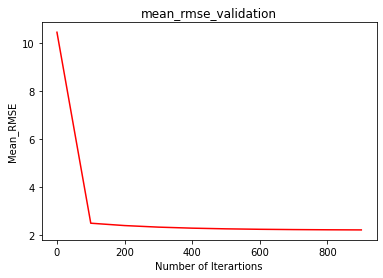

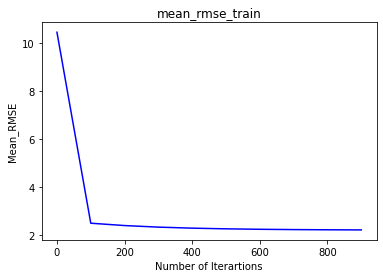

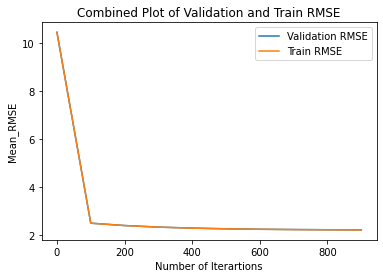

In [18]:
"""Ploting figure required for the first part"""


plt.plot(iter,mean_rmse_test,'-r')
plt.title("mean_rmse_validation")
plt.xlabel('Number of Iterartions')
plt.ylabel("Mean_RMSE")

plt.show()

plt.plot(iter,mean_rmse_train,'-b')
plt.xlabel('Number of Iterartions')
plt.ylabel("Mean_RMSE")
plt.title("mean_rmse_train")

plt.show()

plt.plot(iter,mean_rmse_test,label="Validation RMSE")
plt.plot(iter,mean_rmse_train,label="Train RMSE")
plt.xlabel('Number of Iterartions')
plt.ylabel("Mean_RMSE")
plt.title("Combined Plot of Validation and Train RMSE")
plt.legend()
plt.show()

In [19]:
"""In this Block of code i have implemented linear regression using normal method(Matrix multiplication method)"""
rmse_test=[]
rmse_train=[]
for k in range(1,6):
    train_ind,test_ind=test_train_splt(n,k,r)
    x_train, y_train=x.iloc[train_ind],y.iloc[train_ind]
    x_test, y_test=x.iloc[test_ind],y.iloc[test_ind]
    theta_best = np.linalg.pinv(x_train).dot(y_train)
    #print(theta_best)
    y_pred_test=x_test.dot(theta_best)
    y_pred_train=x_train.dot(theta_best)
    rmse_test.append(RMSE(y_pred_test,y_test))
    rmse_train.append(RMSE(y_pred_train,y_train))


print("rmse on Validation set: ",rmse_test)
print("rmse on train set: ",rmse_train)

print("mean_rmse on Validation set: ",sum(rmse_test)/5)
print("mean_rmse on train set: ",sum(rmse_train)/5)

rmse on Validation set:  [2.2116130871218393, 2.127793729968393, 2.337674986245132, 2.3616640620654543, 2.0125803567938925]
rmse on train set:  [2.1872023441312556, 2.2084886816875144, 2.1559887547117658, 2.162376650581619, 2.234418427075385]
mean_rmse on Validation set:  2.210265244438942
mean_rmse on train set:  2.189694971637508


In [ ]:
""" Quest1 part B """

' Quest1 part B '

In [20]:
"""splitting traing and testing set according to best error found on validation set in part a)"""
tra_ind,tes_ind=test_train_splt(n,3,r)
x_tra, y_tra=x.iloc[tra_ind],y.iloc[tra_ind]
x_tes, y_tes=x.iloc[tes_ind],y.iloc[tes_ind]

In [21]:
"""Regularised Linear Model"""
class Regularised_LinearRegression() :
      
    def __init__( self, learning_rate, iterations,alpha) :
          
        self.learning_rate = learning_rate
        self.iterations = iterations 
        self.alpha=alpha
        
    def fit_L1( self, X, Y ) :
          
        self.m, self.n = X.shape
        self.W = np.zeros( self.n )
  
        self.X = X
        self.Y = Y         
        for i in range( self.iterations ) :
          self.W_temp=np.zeros(self.n)
          for i in range(self.n):
            if(self.W[i]>0):
              self.W_temp[i]=1
            elif(self.W[i]==0):
              self.W_temp[i]=0
            else:
              self.W_temp[i]=-1
        
          self.gradients = (2/self.m * self.X.T.dot(self.X.dot(self.W) - self.Y))+(self.alpha*self.W_temp)
          self.W=self.W-self.learning_rate*self.gradients
        return self

    def fit_L2( self, X, Y ) :
          
        self.m, self.n = X.shape
        self.W = np.zeros( self.n )
  
        self.X = X
        self.Y = Y         
        for i in range( self.iterations ) :
          self.gradients = 2/self.m * self.X.T.dot(self.X.dot(self.W) - self.Y)+(self.alpha*self.W)
          self.W=self.W-self.learning_rate*self.gradients
        
        return self

    def predict( self, X ) :    
        return X.dot( self.W )

In [ ]:
"""Hyper parameter tunning for L2"""


ridge=Ridge()
param={'alpha':[1e-10,1e-5,1e-3,1e-2,1e-1,0.3,0.8,1,10,100,1000]}
ridge_regressor=GridSearchCV(ridge,param,scoring="neg_root_mean_squared_error", cv=5)
ridge_regressor.fit(x_tra,y_tra)

alpha=ridge_regressor.best_params_['alpha']
print("Best hyperparameter for L2 case is:",alpha)

Best hyperparameter for L2 case is: 0.3


In [ ]:
"""Using L2 regularised linear model for prediction"""
iter_L2=[]
reg_rmse_test_L2=[]
reg_rmse_train_L2=[]

for number_of_iter in range(0,3000,300):
    model =Regularised_LinearRegression(learning_rate,number_of_iter,alpha)
    model.fit_L2(x_tra, y_tra)
    Y_train_L2 = model.predict(x_tra)
    Y_test_L2=model.predict(x_tes)
    #print(sqrt(mean_squared_error(Y_train_p,y_train)),sqrt(mean_squared_error(Y_test_p,y_test)))
  
    reg_rmse_test_L2.append(RMSE(Y_test_L2,y_tes))
    reg_rmse_train_L2.append(RMSE(Y_train_L2,y_tra))
    iter_L2.append(number_of_iter)

In [ ]:
print("L2 regularised test error: " ,reg_rmse_test_L2)
print("L2 regularised train error: ",reg_rmse_train_L2)

L2 regularised test error:  [10.555706469398453, 2.8863309398420256, 2.886330939842023, 2.886330939842023, 2.886330939842023, 2.886330939842023, 2.886330939842023, 2.886330939842023, 2.886330939842023, 2.886330939842023]
L2 regularised train error:  [10.41544224340707, 2.6844392005101017, 2.684439200510097, 2.684439200510097, 2.684439200510097, 2.684439200510097, 2.684439200510097, 2.684439200510097, 2.684439200510097, 2.684439200510097]


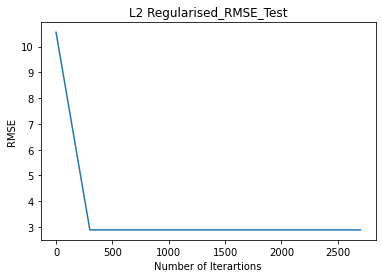

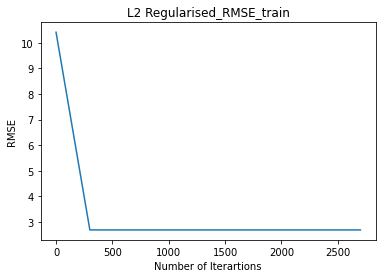

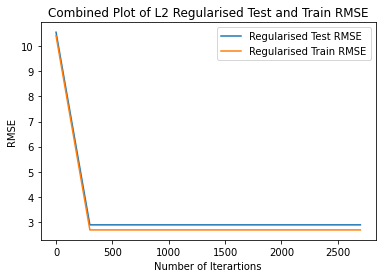

In [ ]:
plt.plot(iter_L2,reg_rmse_test_L2)
plt.title("L2 Regularised_RMSE_Test")
plt.xlabel('Number of Iterartions')
plt.ylabel("RMSE")
plt.show()

plt.plot(iter_L2,reg_rmse_train_L2)
plt.xlabel('Number of Iterartions')
plt.ylabel("RMSE")
plt.title("L2 Regularised_RMSE_train")
plt.show()

plt.plot(iter_L2,reg_rmse_test_L2,label="Regularised Test RMSE")
plt.plot(iter_L2,reg_rmse_train_L2,label="Regularised Train RMSE")
plt.xlabel('Number of Iterartions')
plt.ylabel("RMSE")
plt.title("Combined Plot of L2 Regularised Test and Train RMSE")
plt.legend()
plt.show()


In [ ]:
"""L1 regulaisation Hyper parameter tunning"""

lasso=Lasso()
lasso_regressor=GridSearchCV(lasso,param,scoring="neg_root_mean_squared_error", cv=5)
lasso_regressor.fit(x_tra,y_tra)

alp=lasso_regressor.best_params_['alpha']
print("Best hyperparameter for L1 case is:",alp)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6177.9989761272445, tolerance: 2.6390118263473066
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6128.504985879356, tolerance: 2.7507359281437136
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5900.5638835066675, tolerance: 2.6301209580838303
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6190.44

Best hyperparameter for L1 case is: 0.001


In [ ]:
"""Prediction using L1 regularised Linear model"""
iter_L1=[]
reg_L1_rmse_test=[]
reg_L1_rmse_train=[]


for number_of_iter in range(0,3000,300):
    model=Regularised_LinearRegression(learning_rate,number_of_iter,alp)
    model.fit_L1(x_tra, y_tra)
    Y_train_L1 = model.predict(x_tra)
    Y_test_L1=model.predict(x_tes)
    #print(sqrt(mean_squared_error(Y_train_p,y_train)),sqrt(mean_squared_error(Y_test_p,y_test)))
  
    reg_L1_rmse_test.append(RMSE(Y_test_L1,y_tes))
    reg_L1_rmse_train.append(RMSE(Y_train_L1,y_tra))
    iter_L1.append(number_of_iter)

In [ ]:
print("L1 regularised test error: " ,reg_L1_rmse_test)
print("L1 regularised train error: " ,reg_L1_rmse_train)

L1 regularised test error:  [10.555706469398453, 2.507913237163432, 2.4143913831524046, 2.3843838562124624, 2.3732179023728106, 2.3679257902217827, 2.3646712147566777, 2.362249729121209, 2.3602477544931926, 2.3585059469172225]
L1 regularised train error:  [10.41544224340707, 2.295062867305824, 2.2058472807068448, 2.179497599098693, 2.1707529142580526, 2.1670891524779696, 2.1650527784272304, 2.1636495190625915, 2.162563736085102, 2.16167674586048]


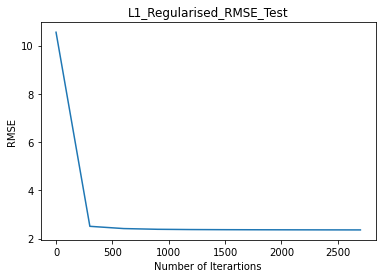

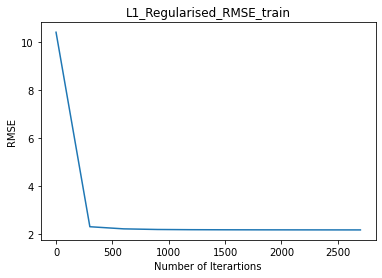

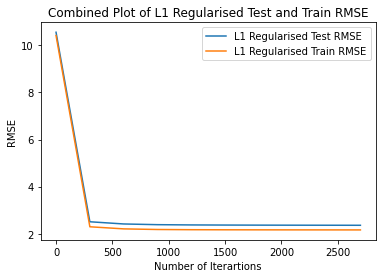

In [ ]:
plt.plot(iter_L1,reg_L1_rmse_test)
plt.title("L1_Regularised_RMSE_Test")
plt.xlabel('Number of Iterartions')
plt.ylabel("RMSE")
plt.show()

plt.plot(iter_L1,reg_L1_rmse_train)
plt.xlabel('Number of Iterartions')
plt.ylabel("RMSE")
plt.title("L1_Regularised_RMSE_train")
plt.show()

plt.plot(iter_L1,reg_L1_rmse_test,label="L1 Regularised Test RMSE")
plt.plot(iter_L1,reg_L1_rmse_train,label="L1 Regularised Train RMSE")
plt.xlabel('Number of Iterartions')
plt.ylabel("RMSE")
plt.title("Combined Plot of L1 Regularised Test and Train RMSE")
plt.legend()
plt.show()

In [ ]:
"""part C """

'part C '

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/data.csv')
dataset["W0"]=1

output=dataset['Body_Weight']
input=dataset.drop(['Body_Weight'],axis=1)
input.head()

,Brain_Weight,W0
0,1.0,1
1,1.6,1
2,2.2,1
3,2.8,1
4,3.4,1


In [ ]:
model=LinearRegression(0.0001,1000)  
model.fit(input,output)
output_pre= model.predict(input)

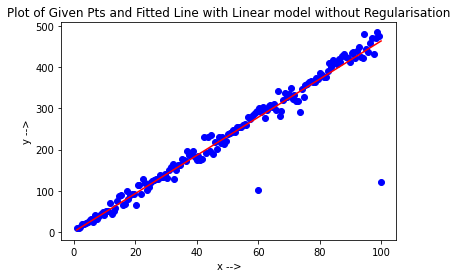

In [ ]:
plt.scatter(dataset['Brain_Weight'],dataset['Body_Weight'],c="blue")
plt.plot(dataset['Brain_Weight'],output_pre,c="red")
plt.title("Plot of Given Pts and Fitted Line with Linear model without Regularisation")
plt.xlabel("x -->")
plt.ylabel("y -->")

plt.show()

In [ ]:
ridge=Ridge()
param={'alpha':[1e-10,1e-5,1e-3,1e-2,1e-1,0.3,0.8,1,10,100,1000]}
ridge_regressor=GridSearchCV(ridge,param,scoring="neg_root_mean_squared_error", cv=5)
ridge_regressor.fit(input,output)

alpha=ridge_regressor.best_params_['alpha']
print("Best hyperparameter for L2 case is:",alpha)

Best hyperparameter for L2 case is: 1e-10


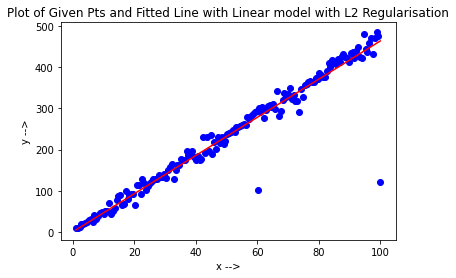

In [ ]:
model_l2=Regularised_LinearRegression(0.0001,100,alpha)
model_l2.fit_L2(input,output)
out_pre_l2=model_l2.predict(input)

plt.scatter(dataset['Brain_Weight'],dataset['Body_Weight'],c="blue")
plt.plot(dataset['Brain_Weight'],out_pre_l2,c="red")
plt.title("Plot of Given Pts and Fitted Line with Linear model with L2 Regularisation")
plt.xlabel("x -->")
plt.ylabel("y -->")

plt.show()

In [ ]:
lasso=Lasso()
lasso_regressor=GridSearchCV(lasso,param,scoring="neg_root_mean_squared_error", cv=5)
lasso_regressor.fit(input,output)

alp=lasso_regressor.best_params_['alpha']
print("Best hyperparameter for L1 case is:",alp)

Best hyperparameter for L1 case is: 1e-10


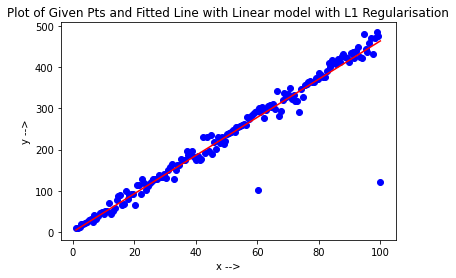

In [ ]:
model_l1=Regularised_LinearRegression(0.0001,100,alp)
model_l1.fit_L1(input,output)
out_pre_l1=model_l1.predict(input)

plt.scatter(dataset['Brain_Weight'],dataset['Body_Weight'],c="blue")
plt.plot(dataset['Brain_Weight'],out_pre_l1,c="red")
plt.title("Plot of Given Pts and Fitted Line with Linear model with L1 Regularisation")
plt.xlabel("x -->")
plt.ylabel("y -->")

plt.show()